In [1]:
import cv2
import matplotlib.pyplot as plt
from color_utils import extractColoredBoundingBox, getFinalPts, getHeatMapColorDifference
from image_utils import extract_yellowcircles, changeFormat
from utils import calculateSimilarity,generateResultsSingleImage
import os
import re

base_dir = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/input_images/20240507_Lactate sensing/android'
results_dir = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/results'


base_image_path = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_1/basesensor_16_.png'
image_path = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_1/basesensor_1_.png'
output = generateResultsSingleImage(base_image_path, image_path, results_dir)
print(output[1])

/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_1/basesensor_16_.png /Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_1/basesensor_1_.png
Working on baseImage..


[ WARN:0@0.614] global loadsave.cpp:241 findDecoder imread_('/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_1/basesensor_16_.png'): can't open/read file: check file path/integrity


error: OpenCV(4.10.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:196: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [5]:
!pip install opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 30.4 MB/s eta 0:00:0031m31.4 MB/s eta 0:00:01


/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_6-natural+white/basesensor_20_.png /Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_6-natural+white/basesensor_20_.png
Working on baseImage..
4
4
Working on image..
4
4
Global Base Image Mean: [169.00012 133.59007 192.94531], Std: [49.087666  8.589799 18.704115]
Assay 1 - Calibrated Mean: 118.85377759733983
Assay 2 - Calibrated Mean: 117.99848927875243
Assay 3 - Calibrated Mean: 118.69906459396842
Assay 4 - Calibrated Mean: 118.83878582157976
Overall Calibrated Average: 118.5975293229101
118.5975293229101
/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_6-natural+white/basesensor_7_.png /Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_6-natural+white/basesensor_7_.png
Working on baseImage..
4
4
Working on image..
4
4
Global Base Image Mean: [159.4028   125.496025 183.866   ], Std: [67.231804  8.281337 23.47289 ]
Assay 1 - C

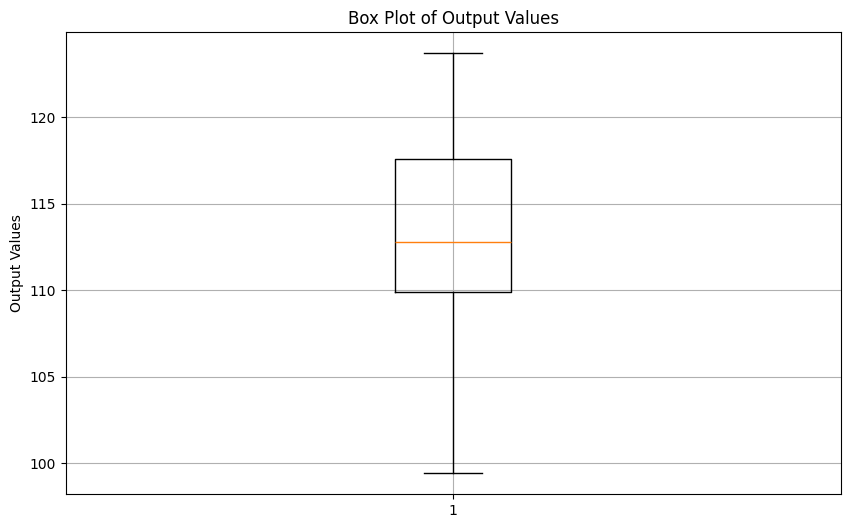

In [ ]:
import cv2
import matplotlib.pyplot as plt
from color_utils import extractColoredBoundingBox, getFinalPts, getHeatMapColorDifference
from image_utils import extract_yellowcircles, changeFormat
from utils import calculateSimilarity,generateResultsSingleImage
import os
import re

dir_path = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images/study_6-natural+white'
base_image_path = os.path.join(dir_path, 'basesensor_9_.png')

def process_images_in_directory(base_image_path, dir_path, results_dir):
    output_values = []
    
    for filename in os.listdir(dir_path):
        if filename.endswith(".png"): 
            image_path = os.path.join(dir_path, filename)
            output = generateResultsSingleImage(image_path, image_path, results_dir)
            print(output[1])
            if(not output[1] is None):
                output_values.append(output[1])
    return output_values

results_dir = '/path/to/save/results'  
output_values = process_images_in_directory(base_image_path, dir_path, results_dir)
print("Output values: ", output_values, len(output_values))

plt.figure(figsize=(10, 6))
plt.boxplot(output_values)
plt.title('Box Plot of Output Values')
plt.ylabel('Output Values')
plt.grid(True)
plt.show()




/var/folders/lh/1rdhghgj7y70c7p65s_kl0qw0000gn/T/ipykernel_34857/469565053.py:62: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxplot = plt.boxplot(study_output_values, labels=study_labels, patch_artist=True)


ValueError: Dimensions of labels and X must be compatible

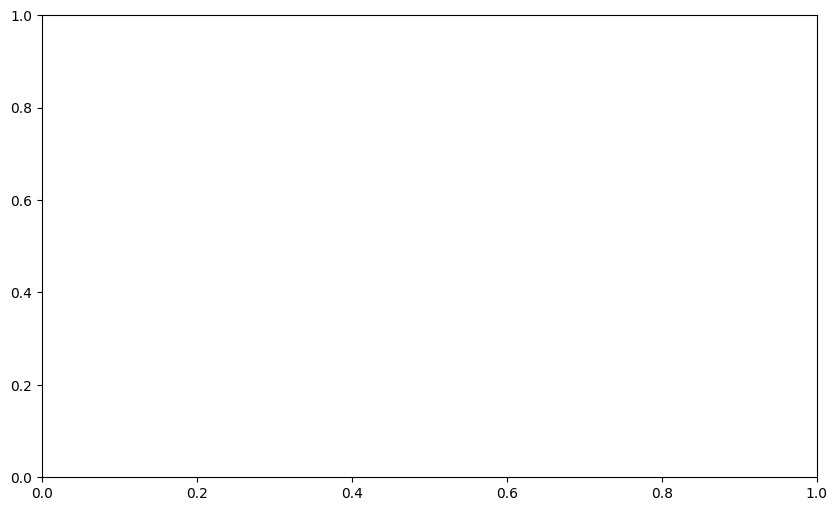

In [7]:
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from utils import generateResultsSingleImage

base_dir = '/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images_2'
results_dir = '/path/to/save/results'  

def process_images_in_directory(study_dir, results_dir):
    output_values = []
    
    for filename in os.listdir(study_dir):
        if filename.endswith(".png"):
            image_path = os.path.join(study_dir, filename)
            try:
                output = generateResultsSingleImage(image_path, image_path, results_dir)
                print(f"Output for {filename}: {output[1]}")
                if output[1] is not None:
                    output_values.append(output[1])
            except Exception as e:
                print(f"Error processing {filename}: {e}")
    
    return output_values

study_output_values = []
study_labels = []

# for study_folder in sorted(os.listdir(base_dir)):
    # if study_folder.startswith('study_'): 
study_folder = 'study_0'
study_dir = os.path.join(base_dir, study_folder)
if os.path.isdir(study_dir):
    study_output = process_images_in_directory(study_dir, results_dir)
    if study_output:
        study_output_values.append(study_output)
    else:
        study_output_values.append([None])  
    study_labels.append(study_folder)  

study_output_values = [values if values != [None] else [] for values in study_output_values]

colors = []
for label in study_labels:
    print('natural' in label, 'white' in label, label)
    print()
    if 'white+yellow' in label:
        colors.append('lightyellow')
    elif 'yellow' in label and 'natural' not in label:
        colors.append('yellow')
    elif 'white' in label and 'natural' not in label:
        colors.append('white')
    elif 'natural' in label:
        if 'white' in label:
            colors.append('lightgreen')
        elif 'yellow' in label:
            colors.append('yellowgreen')
        else:
            colors.append('green')

plt.figure(figsize=(10, 6))

boxplot = plt.boxplot(study_output_values, labels=study_labels, patch_artist=True)

for patch, color in zip(boxplot['boxes'], colors):
    patch.set_facecolor(color)

legend_elements = [
    Patch(facecolor='yellow', label='yellow (study_2, study_4)'),
    Patch(facecolor='white', label='white (study_3)'),
    Patch(facecolor='green', label='natural (study_5)'),
    Patch(facecolor='yellowgreen', label='natural+yellow (study_1)'),
     Patch(facecolor='lightgreen', label='natural+white (study_6)')
]

plt.legend(handles=legend_elements, loc='upper right')

plt.title('Box Plot of Output Values by Study')
plt.xlabel('Study')
plt.ylabel('Output Values')
plt.ylim(0, 190)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [10]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from utils import generateResultsSingleImage

base_dir = '/Users/apparilalith/ASU Dropbox/Lalith Appari/Mac/Desktop/asu/mayolab/woundsensor/ios_app/test_images_3'
results_dir = '/path/to/save/results'

def parse_filename(filename):
    """
    Parses the filename to extract metadata.
    Example filename format: basesensor_u1-h1-b1-natural_.png
    """
    data = filename.split('_')
    parts = data[1].split('-')
    
    user = parts[0]  # Extract user number (e.g., u1)
    height = convert_height(parts[1])  # Convert h1 or h2 to descriptive labels
    background = convert_background(parts[2])  # Convert b1 or b2 to descriptive labels
    lighting = convert_lighting(parts[3])  # Convert lighting condition labels
    
    return user, height, background, lighting

def convert_height(height_code):
    """Converts height codes (h1, h2) to descriptive labels."""
    return {
        'h1': '30-35 cm',
        'h2': '15-20 cm'
    }.get(height_code, 'Unknown')

def convert_background(background_code):
    """Converts background codes (b1, b2) to descriptive labels."""
    return {
        'b1': 'Black',
        'b2': 'Brown'
    }.get(background_code, 'Unknown')

def convert_lighting(lighting_code):
    """Converts lighting labels to descriptive lux values."""
    return {
        'yellow': '200 lux',
        'white': '400-500 lux',
        'natural': '> 800 lux'
    }.get(lighting_code, 'Unknown')

def process_images_in_directory(study_dir, results_dir):
    """Processes all PNG images in the directory and extracts relevant metadata."""
    output_values = []
    metadata = []

    for filename in os.listdir(study_dir):
        if filename.endswith(".png"):
            image_path = os.path.join(study_dir, filename)

            # Extract metadata from filename
            user, height, background, lighting = parse_filename(filename)
            print(f"Processing {filename} under {lighting} lighting...")

            # Generate results for the image
            output = generateResultsSingleImage(image_path, image_path, results_dir)
            print(f"Output for {filename}: {output[1]}")

            # Store metadata and output if valid
            if output[1] is not None:
                output_values.append(output[1])
                metadata.append({
                    'User': user,
                    'Height': height,
                    'Background': background,
                    'Lighting': lighting,
                    'Output': output[1]
                })

    return output_values, metadata

# Collect data from all study folders
all_metadata = []
study_folders = os.listdir(base_dir)

for study_folder in study_folders:
    if study_folder.startswith('study_'): 
        study_dir = os.path.join(base_dir, study_folder)
        if os.path.isdir(study_dir):
            study_output, study_metadata = process_images_in_directory(study_dir, results_dir)
            if study_metadata:
                all_metadata.extend(study_metadata)

# Convert metadata to DataFrame for further analysis
df_all = pd.DataFrame(all_metadata)

# Display the DataFrame (Optional)
print(df_all)

Empty DataFrame
Columns: []
Index: []


<Figure size 1000x600 with 0 Axes>

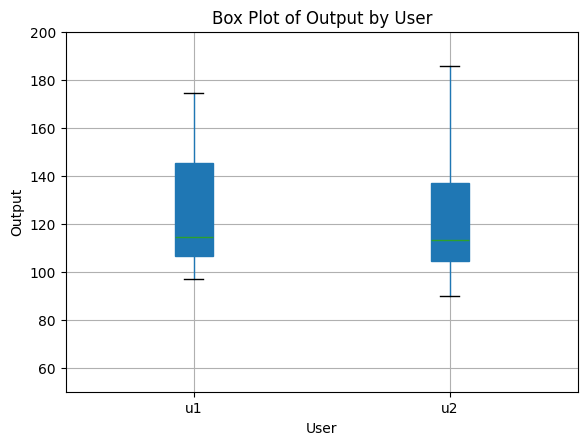

<Figure size 1000x600 with 0 Axes>

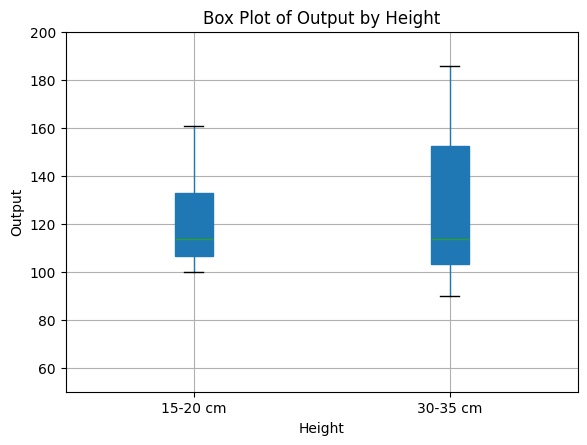

<Figure size 1000x600 with 0 Axes>

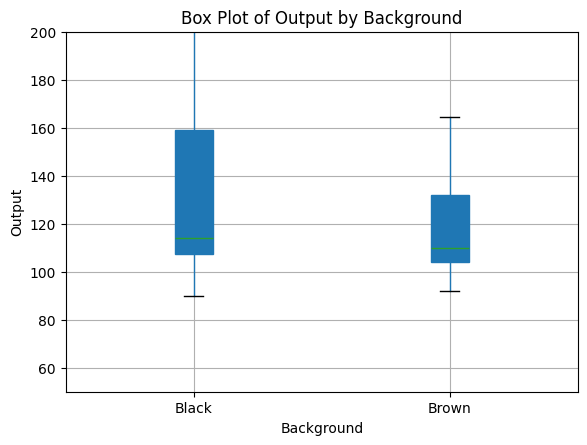

<Figure size 1000x600 with 0 Axes>

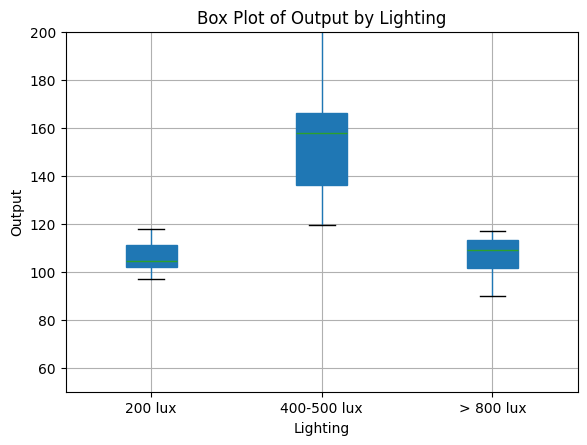

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = df_all
low_lim = 50
hi_lim = 200

# Box Plot by User
plt.figure(figsize=(10, 6))
df.boxplot(column='Output', by='User', patch_artist=True)
plt.title('Box Plot of Output by User')
plt.suptitle('')
plt.xlabel('User')
plt.ylabel('Output')
plt.ylim(low_lim, hi_lim)  # Set y-axis limit
plt.grid(True)
plt.show()

# Box Plot by Height
plt.figure(figsize=(10, 6))
df.boxplot(column='Output', by='Height', patch_artist=True)
plt.title('Box Plot of Output by Height')
plt.suptitle('')
plt.xlabel('Height')
plt.ylabel('Output')
plt.ylim(low_lim, hi_lim)  # Set y-axis limit
plt.grid(True)
plt.show()

# Box Plot by Background
plt.figure(figsize=(10, 6))
df.boxplot(column='Output', by='Background', patch_artist=True)
plt.title('Box Plot of Output by Background')
plt.suptitle('')
plt.xlabel('Background')
plt.ylabel('Output')
plt.ylim(low_lim, hi_lim)  # Set y-axis limit
plt.grid(True)
plt.show()

# Box Plot by Lighting
plt.figure(figsize=(10, 6))
df.boxplot(column='Output', by='Lighting', patch_artist=True)
plt.title('Box Plot of Output by Lighting')
plt.suptitle('')
plt.xlabel('Lighting')
plt.ylabel('Output')
plt.ylim(low_lim, hi_lim)  # Set y-axis limit
plt.grid(True)
plt.show()


/var/folders/xm/5s6wbj5j55x0qntmv6zsk8lh0000gn/T/ipykernel_43616/1996571725.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df_non_white[df_non_white['User'] == user]['Output'] for user in df_non_white['User'].unique()],
/var/folders/xm/5s6wbj5j55x0qntmv6zsk8lh0000gn/T/ipykernel_43616/1996571725.py:24: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df_white[df_white['User'] == user]['Output'] for user in df_white['User'].unique()],


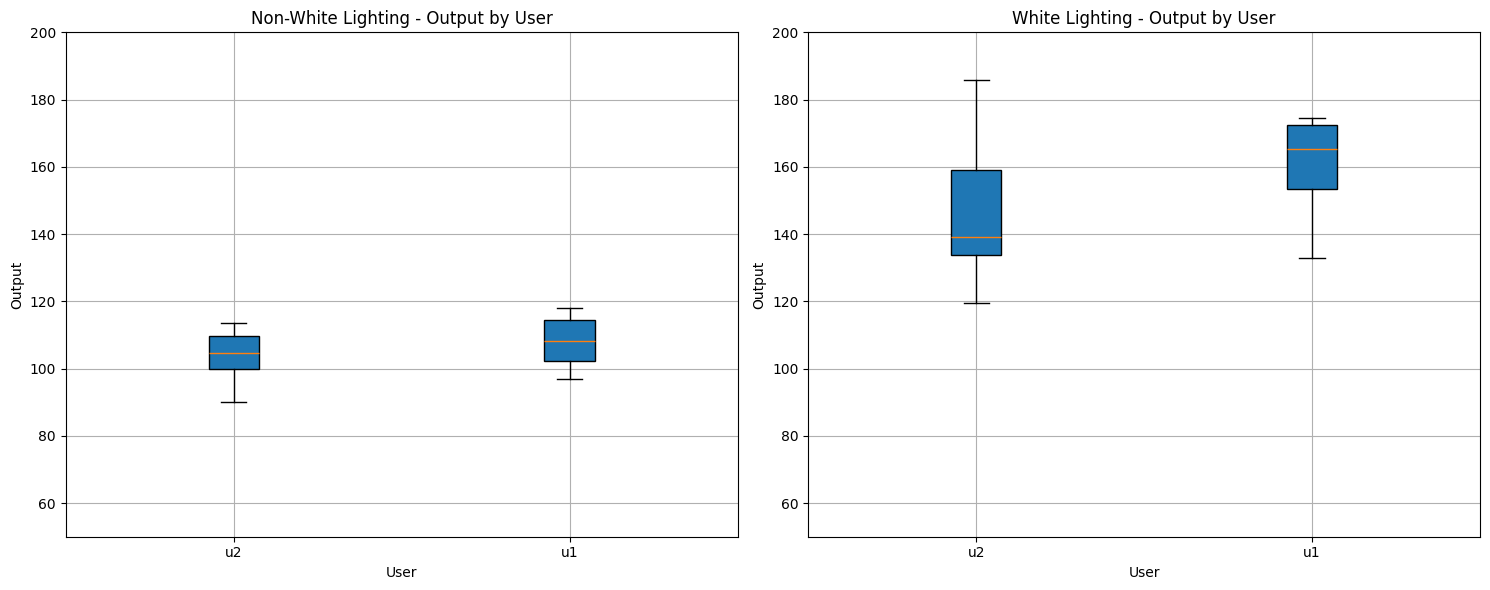

/var/folders/xm/5s6wbj5j55x0qntmv6zsk8lh0000gn/T/ipykernel_43616/1996571725.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df_non_white[df_non_white['Height'] == height]['Output'] for height in df_non_white['Height'].unique()],
/var/folders/xm/5s6wbj5j55x0qntmv6zsk8lh0000gn/T/ipykernel_43616/1996571725.py:51: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df_white[df_white['Height'] == height]['Output'] for height in df_white['Height'].unique()],


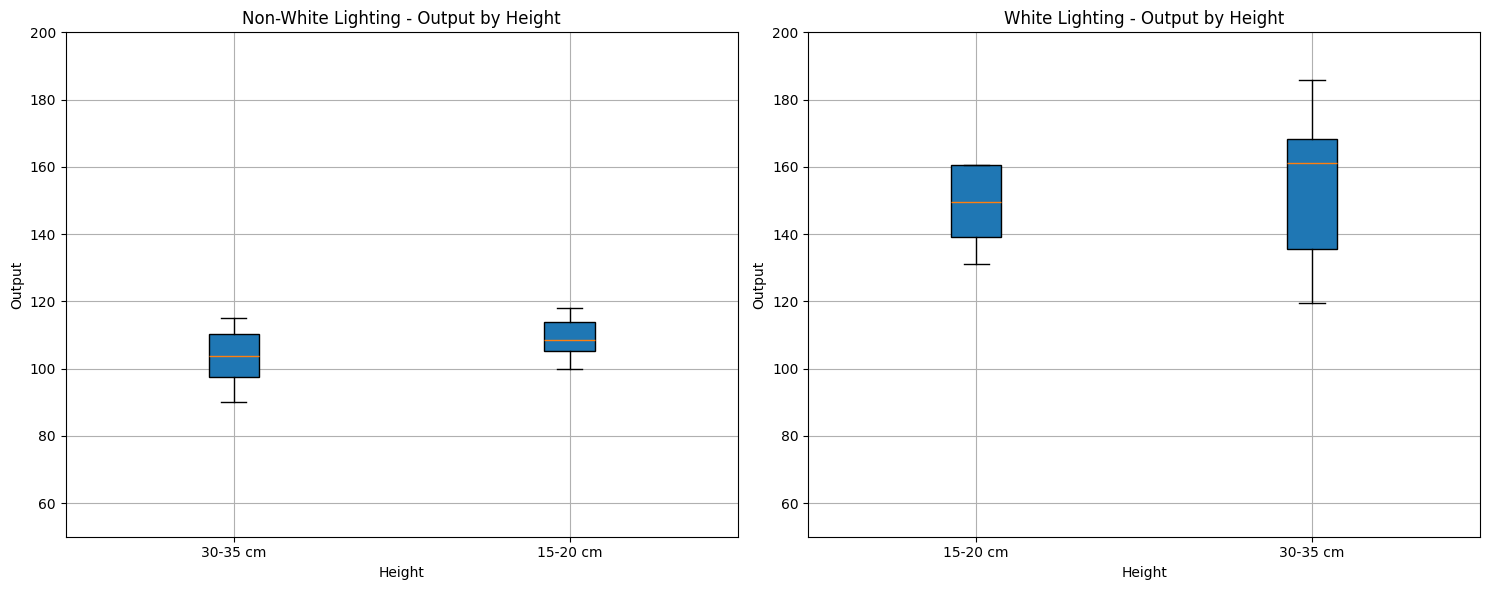

/var/folders/xm/5s6wbj5j55x0qntmv6zsk8lh0000gn/T/ipykernel_43616/1996571725.py:66: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot([df_non_white[df_non_white['Background'] == bg]['Output'] for bg in df_non_white['Background'].unique()],
/var/folders/xm/5s6wbj5j55x0qntmv6zsk8lh0000gn/T/ipykernel_43616/1996571725.py:75: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot([df_white[df_white['Background'] == bg]['Output'] for bg in df_white['Background'].unique()],


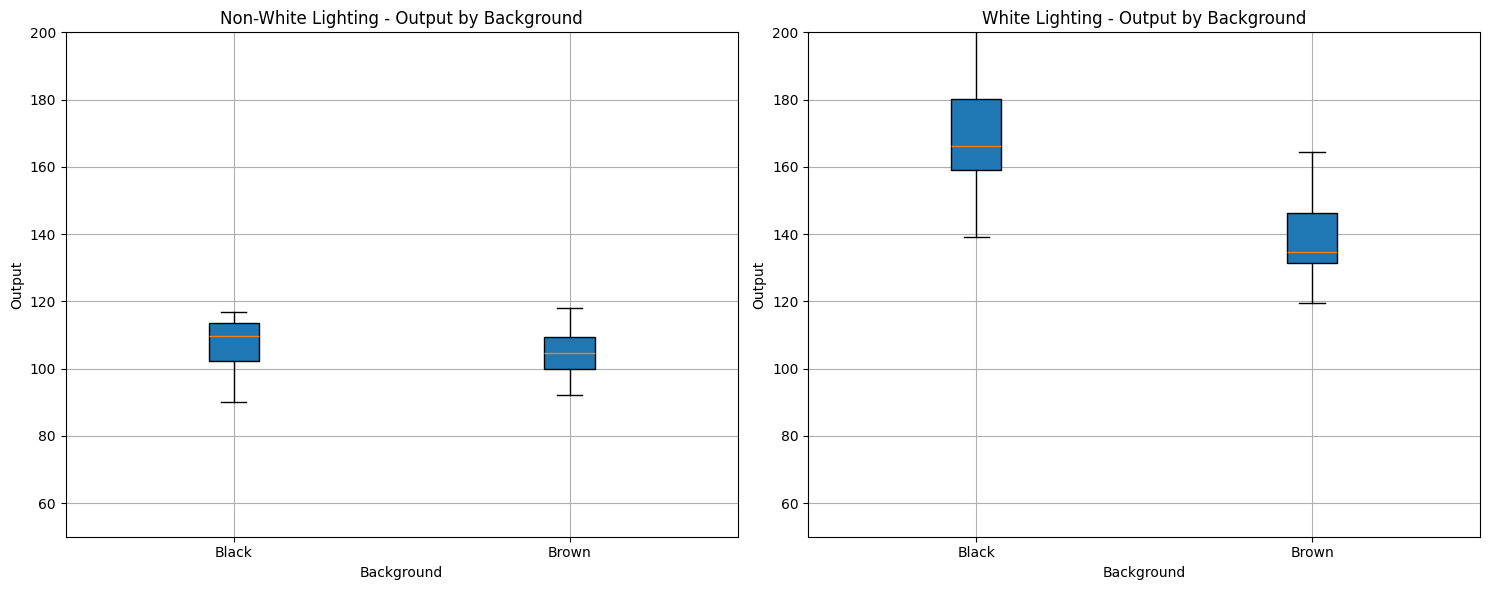

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter for non-white and white lighting conditions
df_non_white = df_all[df_all['Lighting'] != convert_lighting('white')]
df_white = df_all[df_all['Lighting'] == convert_lighting('white')]

low_lim = 50
hi_lim = 200

# Set up side-by-side plotting
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box Plot for non-white lighting
axes[0].boxplot([df_non_white[df_non_white['User'] == user]['Output'] for user in df_non_white['User'].unique()],
                patch_artist=True, labels=df_non_white['User'].unique())
axes[0].set_title('Non-White Lighting - Output by User')
axes[0].set_xlabel('User')
axes[0].set_ylabel('Output')
axes[0].set_ylim(low_lim, hi_lim)
axes[0].grid(True)

# Box Plot for white lighting
axes[1].boxplot([df_white[df_white['User'] == user]['Output'] for user in df_white['User'].unique()],
                patch_artist=True, labels=df_white['User'].unique())
axes[1].set_title('White Lighting - Output by User')
axes[1].set_xlabel('User')
axes[1].set_ylabel('Output')
axes[1].set_ylim(low_lim, hi_lim)
axes[1].grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Repeat similar side-by-side comparisons for Height and Background

# Box Plot by Height
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box Plot for non-white lighting by Height
axes[0].boxplot([df_non_white[df_non_white['Height'] == height]['Output'] for height in df_non_white['Height'].unique()],
                patch_artist=True, labels=df_non_white['Height'].unique())
axes[0].set_title('Non-White Lighting - Output by Height')
axes[0].set_xlabel('Height')
axes[0].set_ylabel('Output')
axes[0].set_ylim(low_lim, hi_lim)
axes[0].grid(True)

# Box Plot for white lighting by Height
axes[1].boxplot([df_white[df_white['Height'] == height]['Output'] for height in df_white['Height'].unique()],
                patch_artist=True, labels=df_white['Height'].unique())
axes[1].set_title('White Lighting - Output by Height')
axes[1].set_xlabel('Height')
axes[1].set_ylabel('Output')
axes[1].set_ylim(low_lim, hi_lim)
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Box Plot by Background
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Box Plot for non-white lighting by Background
axes[0].boxplot([df_non_white[df_non_white['Background'] == bg]['Output'] for bg in df_non_white['Background'].unique()],
                patch_artist=True, labels=df_non_white['Background'].unique())
axes[0].set_title('Non-White Lighting - Output by Background')
axes[0].set_xlabel('Background')
axes[0].set_ylabel('Output')
axes[0].set_ylim(low_lim, hi_lim)
axes[0].grid(True)

# Box Plot for white lighting by Background
axes[1].boxplot([df_white[df_white['Background'] == bg]['Output'] for bg in df_white['Background'].unique()],
                patch_artist=True, labels=df_white['Background'].unique())
axes[1].set_title('White Lighting - Output by Background')
axes[1].set_xlabel('Background')
axes[1].set_ylabel('Output')
axes[1].set_ylim(low_lim, hi_lim)
axes[1].grid(True)

plt.tight_layout()
plt.show()


In [10]:
import heapq

def lex_largest_sequence(arr, state, m):
    n = len(arr)
    state = list(state)  # Convert to list for mutability
    heap = []
    newly_unlocked = []

    # Initialize the heap with all initially '1' elements
    for i in range(n):
        if state[i] == '1':
            # Use negative values to simulate max-heap
            heapq.heappush(heap, (-arr[i], i))
            newly_unlocked.append(i)

    sequence = []

    for _ in range(m):
        if not heap:
            break  # No available elements to select

        # Peek at the largest available element without popping
        # Since heapq doesn't support peek without pop, we pop and push back
        neg_val, idx = heapq.heappop(heap)
        val = -neg_val
        sequence.append(val)
        heapq.heappush(heap, (neg_val, idx))  # Push it back to allow multiple selections

        # Process unlocking based on currently unlocked indices
        next_unlocked = []
        for unlocked_idx in newly_unlocked:
            for neighbor in [unlocked_idx - 1, unlocked_idx + 1]:
                if 0 <= neighbor < n and state[neighbor] == '0':
                    state[neighbor] = '1'  # Unlock the element
                    heapq.heappush(heap, (-arr[neighbor], neighbor))
                    next_unlocked.append(neighbor)
        newly_unlocked = next_unlocked  # Update the list for the next operation

    return sequence

# Example Usage
if __name__ == "__main__":
    # Example Input
    arr = [5, 4, 3, 6]
    state = "1100"
    m = 5

    result = lex_largest_sequence(arr, state, m)
    print(result)  # Output: [5, 5, 6, 6, 6]

[5, 5, 6, 6, 6]


In [15]:
import requests
import base64
import json

# API endpoint URL
url = "https://7yuc4ou0sh.execute-api.us-west-2.amazonaws.com/dev-stage"

# Convert images to base64 encoding
def encode_image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

# Paths to your images
base_image_path = "/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images_2/study_0/basesensor_u1-h1-b1-natural_.png"
exposed_image_path = "/Users/apparilalith/Desktop/asu/mayolab/woundsensor/ios_app/test_images_2/study_0/basesensor_u1-h1-b1-white_2.png"

# Encode the images
base_image_encoded = encode_image_to_base64(base_image_path)
exposed_image_encoded = encode_image_to_base64(exposed_image_path)

# Encode the images
base_image_encoded = encode_image_to_base64(base_image_path)
exposed_image_encoded = encode_image_to_base64(exposed_image_path)

# Create the body payload as a JSON string
body_content = {
    "baseimage": base_image_encoded,
    "exposedimage": exposed_image_encoded
}

# Wrap the body in another dictionary for the "body" key
payload =  json.dumps(body_content)


# Define headers
headers = {
    "Content-Type": "application/json"
}

# Make the POST request
# try:
response = requests.post(url, json=payload, headers=headers)
response.raise_for_status()  # Raise an error for HTTP codes 4xx/5xx
print("Response Status Code:", response.status_code)
print("Response Body:", response.json())
# except requests.exceptions.RequestException as e:
#     print("An error occurred:", str(e))
# #     print("An error occurred:", str(e))



Response Status Code: 200
Response Body: {'message': 'Processing completed', 'output_value': 118.90120793787747}
